## Python Code for Sentiment Analysis of Product Reviews
# Explanation of the Code:
  1. Data Collection: A sample dataset of product reviews and their sentiments is created. Replace this with your own dataset.
  2. Preprocessing: Text data is cleaned by converting to lowercase and removing punctuation.
  3. Lexicon-Based Sentiment Analysis: TextBlob is used to classify sentiments based on the polarity of the text.
  4. Machine Learning-Based Sentiment Analysis: The text data is vectorized using TfidfVectorizer. A Multinomial Naive Bayes classifier is trained to predict sentiments.

Machine Learning Model Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

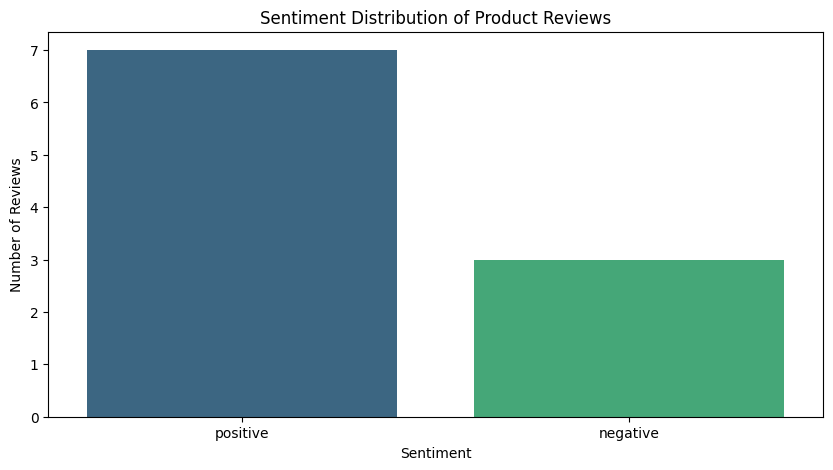

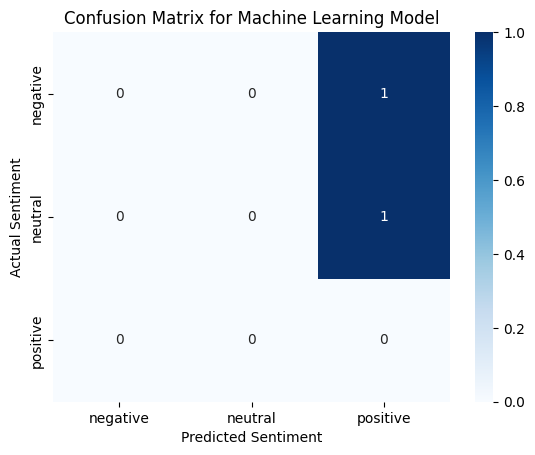

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Collection
# Example dataset (replace with your own dataset)
data = {
    "review": [
        "I love this product, it works great!",
        "Terrible experience, would not recommend.",
        "The product is okay, but could be better.",
        "Amazing quality and fast delivery.",
        "Not satisfied with the purchase.",
        "It's a good product for the price.",
        "Worst product ever, complete waste of money.",
        "I am happy with my purchase.",
        "The product is average, nothing special.",
        "Excellent service and great product!"
    ],
    "sentiment": ["positive", "negative", "neutral", "positive", "negative", "positive", "negative", "positive", "neutral", "positive"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocessing
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char == ' '])
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Step 3: Lexicon-Based Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

df['lexicon_sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Step 4: Machine Learning-Based Sentiment Analysis
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiments
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Machine Learning Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Hybrid Sentiment Analysis
# Combine lexicon and ML predictions
df['hybrid_sentiment'] = df.apply(lambda row: row['lexicon_sentiment'] if row['lexicon_sentiment'] == row['sentiment'] else classifier.predict(vectorizer.transform([row['cleaned_review']]))[0], axis=1)

# Step 6: Visualization
# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='hybrid_sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution of Product Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Confusion Matrix for ML model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix for Machine Learning Model")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

# Output
  1. Sentiment Distribution: A bar chart showing the count of positive, negative, and neutral reviews.

  2. Confusion Matrix: A heatmap showing the performance of the machine learning model.

  3. Accuracy and Classification Report: Metrics for evaluating the model's performance.